### 1. Load the dataset into python environment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('titanic_dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Make ‘PassengerId’ as the index column

In [3]:
data=data.set_index('PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Check the basic details of the dataset

In [4]:
data.shape

(891, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
len(data[data['Sex'] == 'male'])

577

In [8]:
len(data[data['Sex'] == 'female'])

314

In [9]:
alive = len(data[data['Survived'] == 1])
dead = len(data[data['Survived'] == 0])

In [10]:
print('No: of people survived=',alive)
print('No: of people dead=',dead)

No: of people survived= 342
No: of people dead= 549


### 4. Fill in all the missing values present in all the columns in the dataset

1. Age

C:\Users\hizan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

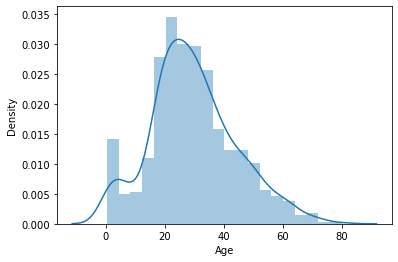

In [11]:
sns.distplot(data['Age'])

<AxesSubplot:>

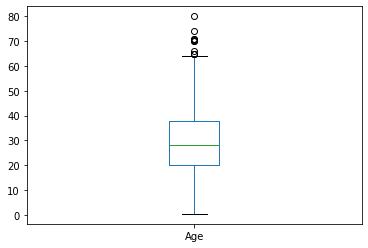

In [12]:
data.boxplot(column=['Age'],grid=False)

In [13]:
#since there is outliers in the data, we fill the age using Median
data['Age']=data['Age'].fillna(data['Age'].median())

2.Cabin

In [14]:
tot_col=data.shape[0]
miss_cab=data['Cabin'].isna().sum()
print('out of',tot_col,',',miss_cab,'no:of information is missing')

out of 891 , 687 no:of information is missing


In [15]:
#'Cabin' has 77% of data missing. Therefore, we drop the column 'cabin'
data=data.drop(['Cabin'],axis=1)

3.Embarked

In [16]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].ffill())

In [17]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### 5. Check and handle outliers in at least 3 columns in the dataset

1. Age

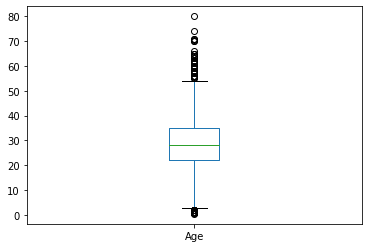

In [18]:
data.boxplot(column=['Age'],grid= False)
plt.show()

In [19]:
# here outlier is present, we use inter quartile range to manage outliers in data, for that we have to find q1,q2,q3
Q1= np.percentile(data['Age'],25,interpolation='midpoint')
Q2= np.percentile(data['Age'],50,interpolation='midpoint')
Q3= np.percentile(data['Age'],75,interpolation='midpoint')

In [20]:
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)

Q1= 22.0
Q2= 28.0
Q3= 35.0


In [21]:
#find Inter Quartile Range,then remove values below lower limit and above upper limit of IQR
IQR = Q3-Q1
print('IQR=',IQR)

IQR= 13.0


In [22]:
low_lim= Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [23]:
print('Lower limit=',low_lim)
print('Upper limit=',up_lim)

Lower limit= 2.5
Upper limit= 54.5


In [24]:
outlier=[]
for x in data['Age']:
    if((x<low_lim)or(x>up_lim)):
        outlier.append(x)

In [25]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [26]:
ind=data['Age']<low_lim  
ind1=data['Age']>up_lim


In [27]:
data.drop(data.loc[ind].index,inplace=True)

In [28]:
data.drop(data.loc[ind1].index,inplace=True)

In [29]:
data.shape

(825, 10)

2. Fare

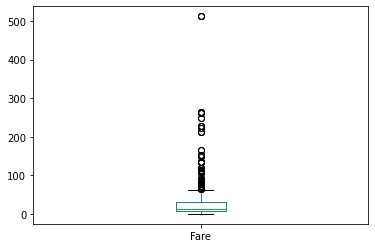

In [30]:
data.boxplot(column=['Fare'],grid= False)
plt.show()

In [31]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [32]:
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)

Q1= 7.8958
Q2= 13.4167
Q3= 30.0708


In [33]:
IQR = Q3-Q1

In [34]:
low_lim= Q1-1.5*IQR
print('Lower limit=',low_lim)

Lower limit= -25.366699999999994


In [35]:
up_lim= Q3+1.5*IQR
print('Upper limit=',up_lim)

Upper limit= 63.333299999999994


In [36]:
outlier=[]
for x in data['Fare']:
    if ((x<low_lim)or(x>up_lim)):
        outlier.append(x)

In [37]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [38]:
ind=data['Fare']>up_lim
ind1=data['Fare']<low_lim

In [39]:
data.drop(data.loc[ind].index,inplace=True)
data.drop(data.loc[ind1].index,inplace=True)

In [40]:
data.shape

(718, 10)

3.SibSp - The number of Siblings/Spouses Aboard

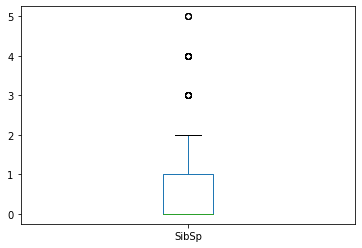

In [41]:
data.boxplot(column=['SibSp'],grid= False)
plt.show()

In [42]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [43]:
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)

Q1= 0.0
Q2= 0.0
Q3= 1.0


In [44]:
IQR=Q3-Q1

In [45]:
low_lim=Q1-1.5*IQR
print('Lower limit=',low_lim)

Lower limit= -1.5


In [46]:
up_lim=Q3+1.5*IQR
print('Upper limit=',up_lim)

Upper limit= 2.5


In [47]:
outlier=[]
for x in data['SibSp']:
    if ((x<low_lim)or(x>up_lim)):
        outlier.append(x)

In [48]:
outlier

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

In [49]:
ind=data['SibSp']>up_lim
ind1=data['SibSp']<low_lim

In [50]:
data.drop(data.loc[ind].index,inplace=True)
data.drop(data.loc[ind1].index,inplace=True)

In [51]:
data.shape

(689, 10)

### 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [52]:
from sklearn import preprocessing

In [53]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.341074,2.493469,28.711176,0.272859,0.269956,16.631246
std,0.474415,0.723586,9.545220,0.501020,0.754625,13.092563
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,33.000000,0.000000,0.000000,23.450000
max,1.000000,3.000000,54.000000,2.000000,6.000000,61.379200


In [54]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [55]:
x=data.iloc[:,[1,4,5,6,8]]
y=data['Survived']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction= model.predict(x_test)
from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(y_test,prediction))
from sklearn.metrics import r2_score
print('R squared value is',r2_score(y_test,prediction))

MSE is 0.19076944345493813
R squared value is 0.18120052261531627


In [57]:
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
x= min_max.fit_transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4
0,1.0,0.372549,0.5,0.000000,0.118118
1,1.0,0.450980,0.0,0.000000,0.129115
2,0.0,0.627451,0.5,0.000000,0.865114
3,1.0,0.627451,0.0,0.000000,0.131152
4,1.0,0.490196,0.0,0.000000,0.137804
...,...,...,...,...,...
684,0.5,0.470588,0.0,0.000000,0.211798
685,0.0,0.313725,0.0,0.000000,0.488765
686,1.0,0.490196,0.5,0.333333,0.382051
687,0.0,0.450980,0.0,0.000000,0.488765


In [58]:
x.describe()

,0,1,2,3,4
count,689.000000,689.000000,689.00000,689.000000,689.000000
mean,0.746734,0.504141,0.13643,0.044993,0.270959
std,0.361793,0.187161,0.25051,0.125771,0.213306
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.500000,0.392157,0.00000,0.000000,0.127962
50%,1.000000,0.490196,0.00000,0.000000,0.171068
75%,1.000000,0.588235,0.00000,0.000000,0.382051
max,1.000000,1.000000,1.00000,1.000000,1.000000


In [59]:
#now we create the linear regression model again to check whether the Min Max scaler had created any change in our data set
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
prediction= model.predict(x_test)
print('MSE is',mean_squared_error(y_test,prediction))
print('R squared value is',r2_score(y_test,prediction))

MSE is 0.19076944345493818
R squared value is 0.18120052261531605


OR for column survived

In [60]:
x = data['Survived'].values.reshape(-1, 1) 
min_max= preprocessing.MinMaxScaler(feature_range=(0,1))
x_scaled = min_max.fit_transform(x)
data['Survived'] = x_scaled

In [61]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,0.341074,2.493469,28.711176,0.272859,0.269956,16.631246
std,0.474415,0.723586,9.545220,0.501020,0.754625,13.092563
min,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000,7.854200
50%,0.000000,3.000000,28.000000,0.000000,0.000000,10.500000
75%,1.000000,3.000000,33.000000,0.000000,0.000000,23.450000
max,1.000000,3.000000,54.000000,2.000000,6.000000,61.379200
